In [ ]:
import pandas as pd
data=pd.read_excel('/content/drive/MyDrive/inflowoutflow.xls.xlsx')
data['Storage']=(data['Inflow in m3/s']-data['Outflow in m3/s'])*2*3600
data

,Time in Hours,Inflow in m3/s,Outflow in m3/s,Storage
0,0,380,380,0
1,2,430,380,360000
2,4,445,387,417600
3,6,460,393,482400
4,8,475,399,547200
5,10,490,408,590400
6,12,505,418,626400
7,14,520,436,604800
8,16,540,455,612000
9,18,560,470,648000


# **Code For Genetic Algorithm**

Generation 0: Best Fitness = 10.56551354900839
Generation 100: Best Fitness = 10.555811110240889
Generation 200: Best Fitness = 10.555589319478019
Generation 300: Best Fitness = 10.555589319478019
Generation 400: Best Fitness = 10.555398848859152
Generation 500: Best Fitness = 10.55537197166762
Generation 600: Best Fitness = 10.555079394308978
Generation 700: Best Fitness = 10.555079394308978
Generation 800: Best Fitness = 10.555079394308978
Generation 900: Best Fitness = 10.55505938447512
Best Solution: [0.44329694955652693, 0.4498069283587805]
Best Fitness: 10.55505938447512
Value of  parameter x = 0.4963554190261444
Value of  parameter k = 0.90621943695368


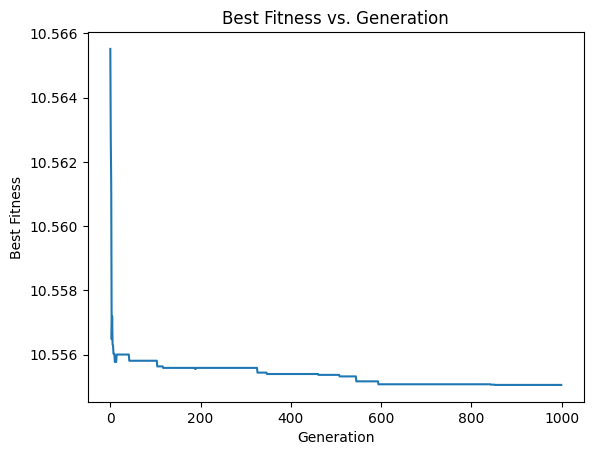

In [ ]:
import random
import numpy as np
from deap import base, creator, tools, algorithms
import matplotlib.pyplot as plt

# Sample data for demonstration
data = {
    'Storage': np.random.rand(100),
    'Inflow in m3/s': np.random.rand(100),
    'Outflow in m3/s': np.random.rand(100)
}

# Define the objective function (Sphere function)
def sphere_function(individual):
    sum_of_square = (data['Storage'] - (individual[0] * data['Inflow in m3/s'] + individual[1] * data['Outflow in m3/s']))
    return np.sum(sum_of_square ** 2),

# Define genetic algorithm parameters
POPULATION_SIZE = 500
DIMENSION = 2
GENERATIONS = 1000
CROSSOVER_RATE = 0.8
MUTATION_RATE = 0.1

# Avoid redefinition warnings by checking if the classes already exist
if 'FitnessMin' not in dir(creator):
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
if 'Individual' not in dir(creator):
    creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, DIMENSION)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", sphere_function)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

def main():
    # Initialize population
    population = toolbox.population(n=POPULATION_SIZE)

    # Define the hall of fame to store the best individuals
    hof = tools.HallOfFame(1)

    # Define the statistics to be collected
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    # List to store the best fitness values at each generation
    best_fitness_values = []

    # Run the genetic algorithm
    for gen in range(GENERATIONS):
        # Evaluate fitness
        fitnesses = list(map(toolbox.evaluate, population))
        for ind, fit in zip(population, fitnesses):
            ind.fitness.values = fit

        # Select the next generation individuals
        offspring = toolbox.select(population, len(population))
        offspring = list(map(toolbox.clone, offspring))

        # Apply crossover and mutation on the offspring
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < CROSSOVER_RATE:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < MUTATION_RATE:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # Replace the population with the offspring
        population[:] = offspring

        # Update the hall of fame with the generated individuals
        hof.update(population)

        # Gather all the fitnesses in one list and print the stats
        record = stats.compile(population)
        best_fitness_values.append(record['min'])

        if gen % 100 == 0:
            print(f"Generation {gen}: Best Fitness = {record['min']}")

    # Print the best solution
    best_solution = hof[0]
    print("Best Solution:", best_solution)
    print("Best Fitness:", sphere_function(best_solution)[0])
    print('Value of  parameter x =',(best_solution[0]/best_solution[1])/(1+best_solution[0]/best_solution[1]))
    print('Value of  parameter k =',best_solution[1]/((best_solution[0]/best_solution[1])/(1+best_solution[0]/best_solution[1])))
    # Plot best fitness vs iteration curve
    plt.plot(best_fitness_values)
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness')
    plt.title('Best Fitness vs. Generation')
    plt.show()

if __name__ == "__main__":
    main()


# **Code For Simulated Annealing**

Generation 0: Best Fitness = 18.692290899246757
Generation 100: Best Fitness = 13.384715594774168
Generation 200: Best Fitness = 12.260650551425867
Generation 300: Best Fitness = 11.862342357025216
Generation 400: Best Fitness = 11.862342357025216
Generation 500: Best Fitness = 11.862342357025216
Generation 600: Best Fitness = 11.862342357025216
Generation 700: Best Fitness = 11.862342357025216
Generation 800: Best Fitness = 11.862342357025216
Generation 900: Best Fitness = 11.588665570626997
Best Solution: [0.5097179684931279, 0.4730933419827823]
Best Fitness: 11.588665570626997
Value of parameter x = 0.5186325829383316
Value of parameter k = 0.9121936367793456


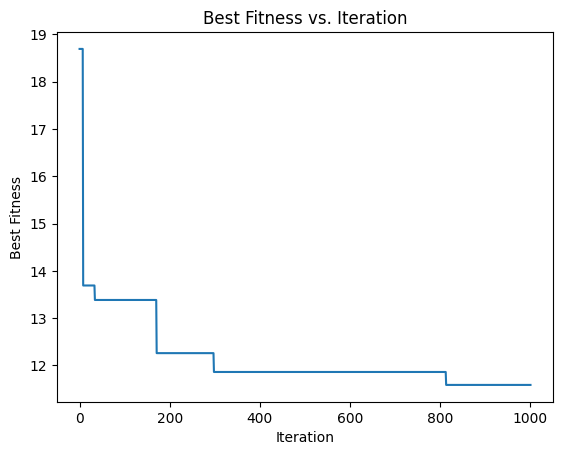

In [ ]:
import random
import numpy as np
from deap import base, creator, tools, algorithms
import matplotlib.pyplot as plt

# Define the objective function (Sphere function)
def sphere_function(individual):
    sum_of_square = (data['Storage'] - (individual[0] * data['Inflow in m3/s'] + individual[1] * data['Outflow in m3/s']))
    return np.sum(sum_of_square ** 2),

# Define genetic algorithm parameters
DIMENSION = 2

# Avoid redefinition warnings by checking if the classes already exist
if 'FitnessMin' not in dir(creator):
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
if 'Individual' not in dir(creator):
    creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, DIMENSION)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", sphere_function)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.1)
toolbox.register("select", tools.selBest)

def simulated_annealing(toolbox, ngen, temp, cooling_rate):
    population = toolbox.population(n=1)  # Start with a single individual
    individual = population[0]
    best_individual = toolbox.clone(individual)
    best_fitness = toolbox.evaluate(best_individual)[0]

    best_fitness_values = [best_fitness]

    for gen in range(ngen):
        new_individual = toolbox.clone(individual)
        toolbox.mutate(new_individual)
        new_fitness = toolbox.evaluate(new_individual)[0]

        if new_fitness < best_fitness:
            best_individual = toolbox.clone(new_individual)
            best_fitness = new_fitness
        elif random.random() < np.exp((toolbox.evaluate(individual)[0] - new_fitness) / temp):
            individual = toolbox.clone(new_individual)

        best_fitness_values.append(best_fitness)
        temp *= cooling_rate

        if gen % 100 == 0:
            print(f"Generation {gen}: Best Fitness = {best_fitness}")

    return best_individual, best_fitness_values

def main():
    temp = 1.0
    cooling_rate = 0.99
    ngen = 1000

    best_solution, best_fitness_values = simulated_annealing(toolbox, ngen, temp, cooling_rate)

    print("Best Solution:", best_solution)
    print("Best Fitness:", sphere_function(best_solution)[0])
    print('Value of parameter x =', (best_solution[0] / best_solution[1]) / (1 + best_solution[0] / best_solution[1]))
    print('Value of parameter k =', best_solution[1] / ((best_solution[0] / best_solution[1]) / (1 + best_solution[0] / best_solution[1])))

    # Plot best fitness vs iteration curve
    plt.plot(best_fitness_values)
    plt.xlabel('Iteration')
    plt.ylabel('Best Fitness')
    plt.title('Best Fitness vs. Iteration')
    plt.show()

if __name__ == "__main__":
    main()


# **Code For Shuffled Frog Leap Algorithm**

Generation 0: Best Fitness = 10.994828767152963
Generation 100: Best Fitness = 10.97872612502638
Generation 200: Best Fitness = 10.97872612502638
Generation 300: Best Fitness = 10.97872612502638
Generation 400: Best Fitness = 10.97872612502638
Generation 500: Best Fitness = 10.97872612502638
Generation 600: Best Fitness = 10.97872612502638
Generation 700: Best Fitness = 10.97872612502638
Generation 800: Best Fitness = 10.97872612502638
Generation 900: Best Fitness = 10.97872612502638
Best Solution: [0.32583297708898507, 0.4785419939020287]
Best Fitness: 10.97872612502638
Value of parameter x = 0.4050759768016516
Value of parameter k = 1.181363549822038


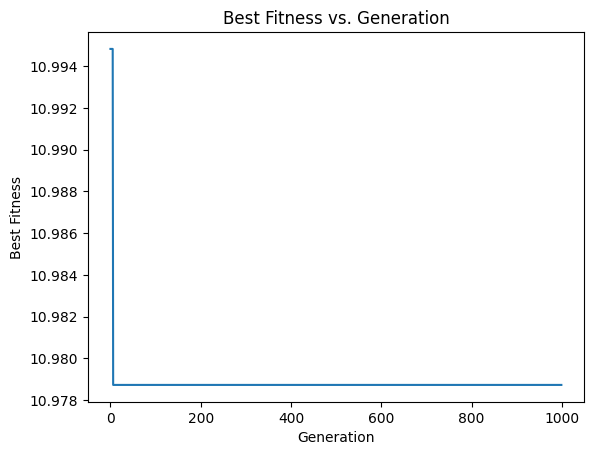

In [ ]:
import random
import numpy as np
from deap import base, creator, tools
import matplotlib.pyplot as plt


# Define the objective function (Sphere function)
def objective_function(individual):
    sum_of_square = (data['Storage'] - (individual[0] * data['Inflow in m3/s'] + individual[1] * data['Outflow in m3/s']))
    return np.sum(sum_of_square ** 2),

# Define genetic algorithm parameters
POPULATION_SIZE = 500
DIMENSION = 2
NUM_SUBGROUPS = 5
GENS_PER_SUBGROUP = 15
TOTAL_GENERATIONS = 1000
MUTATION_RATE = 0.1

# Avoid redefinition warnings by checking if the classes already exist
if 'FitnessMin' not in dir(creator):
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
if 'Individual' not in dir(creator):
    creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, DIMENSION)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", objective_function)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.1)

def create_subgroups(population, num_subgroups):
    random.shuffle(population)
    subgroups = [population[i::num_subgroups] for i in range(num_subgroups)]
    return subgroups

def evolve_subgroup(subgroup):
    best_individual = min(subgroup, key=lambda ind: ind.fitness.values)
    for gen in range(GENS_PER_SUBGROUP):
        for i in range(len(subgroup)):
            if random.random() < MUTATION_RATE:
                toolbox.mutate(subgroup[i])
                del subgroup[i].fitness.values

        for ind in subgroup:
            ind.fitness.values = toolbox.evaluate(ind)

        new_best_individual = min(subgroup, key=lambda ind: ind.fitness.values)
        if new_best_individual.fitness.values < best_individual.fitness.values:
            best_individual = new_best_individual

    return best_individual

def shuffled_frog_leaping(toolbox, ngen):
    population = toolbox.population(n=POPULATION_SIZE)

    best_solution = None
    best_fitness_values = []

    for gen in range(ngen):
        subgroups = create_subgroups(population, NUM_SUBGROUPS)

        for subgroup in subgroups:
            best_individual = evolve_subgroup(subgroup)
            if best_solution is None or best_individual.fitness.values < best_solution.fitness.values:
                best_solution = toolbox.clone(best_individual)

        best_fitness_values.append(best_solution.fitness.values[0])

        if gen % 100== 0:
            print(f"Generation {gen}: Best Fitness = {best_solution.fitness.values[0]}")

    return best_solution, best_fitness_values

def main():
    ngen = TOTAL_GENERATIONS

    best_solution, best_fitness_values = shuffled_frog_leaping(toolbox, ngen)

    print("Best Solution:", best_solution)
    print("Best Fitness:", best_solution.fitness.values[0])
    print('Value of parameter x =', (best_solution[0] / best_solution[1]) / (1 + best_solution[0] / best_solution[1]))
    print('Value of parameter k =', best_solution[1] / ((best_solution[0] / best_solution[1]) / (1 + best_solution[0] / best_solution[1])))

    # Plot best fitness vs iteration curve
    plt.plot(best_fitness_values)
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness')
    plt.title('Best Fitness vs. Generation')
    plt.show()

if __name__ == "__main__":
    main()
